# projet Analyse de donnée
## MEBANG MBOUROUNOU AMINTA

In [2]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


## Contexte: 
        Cet ensemble de données comprend les transactions par carte de crédit dans l'ouest des États-Unis. Il comprend des informations sur chaque transaction, y compris les détails du client, le commerçant et la catégorie d'achat, et si la transaction était ou non une fraude.

  * 🗺️ Exploration: Quels types d'achats sont les plus susceptibles d'être des cas de fraude ? Considérez à la fois la catégorie de produit et le montant de la transaction.
  
  * 📊 Visualisation: Utilisez un tracé géospatial pour visualiser les taux de fraude dans différents états.
  
  * 🔎 Analyse : Les clients âgés sont-ils significativement plus susceptibles d'être victimes de fraude à la carte bancaire ?
 
  *  commençons l'analyse !


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# chargement des données :

les données sont dans un fichier csv

In [4]:
df = pd.read_csv("data/datacamp_workspace_export_2022-12-10 18_15_17.csv")

In [5]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [6]:
df.info

<bound method DataFrame.info of      trans_date_trans_time                     merchant        category  \
0      2019-01-01 00:00:44  "Heller, Gutmann and Zieme"     grocery_pos   
1      2019-01-01 00:00:51               Lind-Buckridge   entertainment   
2      2019-01-01 00:07:27                    Kiehn Inc     grocery_pos   
3      2019-01-01 00:09:03                  Beier-Hyatt    shopping_pos   
4      2019-01-01 00:21:32                   Bruen-Yost        misc_pos   
...                    ...                          ...             ...   
1328   2019-01-05 12:19:35                Friesen-Ortiz   personal_care   
1329   2019-01-05 12:22:59               Erdman-Schaden   personal_care   
1330   2019-01-05 12:33:26               Erdman-Schaden   personal_care   
1331   2019-01-05 12:42:03                   Barton LLC       kids_pets   
1332   2019-01-05 13:02:19               Dietrich-Fadel  health_fitness   

         amt                      city state      lat      long  ci

In [7]:
fraude = df.groupby(['is_fraud']).count()["amt"]
fraude

is_fraud
0    1325
1       8
Name: amt, dtype: int64

## Question/Context

* 🗺️ Exploration: Quels types d'achats sont les plus susceptibles d'être des cas de fraude ? Considérez à la fois la catégorie de produit et le montant de la transaction.

pour repondre nous allons illustrer  les catégories en fonction du montant et quels sont les categories les plus touchés par les fraudes

In [8]:
df.groupby(['category','is_fraud']).count()

trans_date_trans_time  merchant  amt  city  state  \
category       is_fraud                                                      
entertainment  0                            72        72   72    72     72   
food_dining    0                            71        71   71    71     71   
gas_transport  0                           166       166  166   166    166   
               1                             2         2    2     2      2   
grocery_net    0                            53        53   53    53     53   
               1                             1         1    1     1      1   
grocery_pos    0                           143       143  143   143    143   
               1                             2         2    2     2      2   
health_fitness 0                            84        84   84    84     84   
               1                             1         1    1     1      1   
home           0                           128       128  128   128    128   
kids_pets      0                           109       109  109   109    109   
misc_net       0                            73        73   73    73     73   
misc_pos       0                            82        82   82    82     82   
               1                             1         1    1     1      1   
personal_care  0                            99        99   99    99     99   
shopping_net   0                           104       104  104   104    104   
               1                             1         1    1     1      1   
shopping_pos   0                           114       114  114   114    114   
travel         0                            27        27   27    27     27   

                         lat  long  city_pop  job  dob  trans_num  merch_lat  \
category       is_fraud                                                        
entertainment  0          72    72        72   72   72         72         72   
food_dining    0          71    71        71   71   71         71         71   
gas_transport  0         166   166       166  166  166        166        166   
               1           2     2         2    2    2          2          2   
grocery_net    0          53    53        53   53   53         53         53   
               1           1     1         1    1    1          1          1   
grocery_pos    0         143   143       143  143  143        143        143   
               1           2     2         2    2    2          2          2   
health_fitness 0          84    84        84   84   84         84         84   
               1           1     1         1    1    1          1          1   
home           0         128   128       128  128  128        128        128   
kids_pets      0         109   109       109  109  109        109        109   
misc_net       0          73    73        73   73   73         73         73   
misc_pos       0          82    82        82   82   82         82         82   
               1           1     1         1    1    1          1          1   
personal_care  0          99    99        99   99   99         99         99   
shopping_net   0         104   104       104  104  104        104        104   
               1           1     1         1    1    1          1          1   
shopping_pos   0         114   114       114  114  114        114        114   
travel         0          27    27        27   27   27         27         27   

                         merch_long  
category       is_fraud              
entertainment  0                 72  
food_dining    0                 71  
gas_transport  0                166  
               1                  2  
grocery_net    0                 53  
               1                  1  
grocery_pos    0                143  
               1                  2  
health_fitness 0                 84  
               1                  1  
home           0                128  
kids_pets      0                109  
misc_net       

In [9]:
c =df.groupby(['category','is_fraud']).sum()['amt']
c


C:\Users\amint\AppData\Local\Temp\ipykernel_24716\1989815271.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c =df.groupby(['category','is_fraud']).sum()['amt']


category        is_fraud
entertainment   0            3960.81
food_dining     0            3353.88
gas_transport   0           10760.22
                1              38.64
grocery_net     0            3097.04
                1              14.37
grocery_pos     0           18234.73
                1             662.55
health_fitness  0            3751.73
                1              18.17
home            0            8141.22
kids_pets       0            6169.46
misc_net        0            5280.30
misc_pos        0            5068.60
                1              49.61
personal_care   0            5108.06
shopping_net    0            8727.23
                1             966.11
shopping_pos    0            4041.90
travel          0            4748.68
Name: amt, dtype: float64

In [10]:
a =df.groupby('category')['is_fraud'].sum()
a


category
entertainment     0
food_dining       0
gas_transport     2
grocery_net       1
grocery_pos       2
health_fitness    1
home              0
kids_pets         0
misc_net          0
misc_pos          1
personal_care     0
shopping_net      1
shopping_pos      0
travel            0
Name: is_fraud, dtype: int64

In [11]:
y= df.groupby('state')['is_fraud'].sum()
y

state
AK    7
AZ    0
CA    0
CO    0
HI    0
ID    0
MO    1
NE    0
NM    0
OR    0
UT    0
WA    0
WY    0
Name: is_fraud, dtype: int64

<AxesSubplot: xlabel='category'>

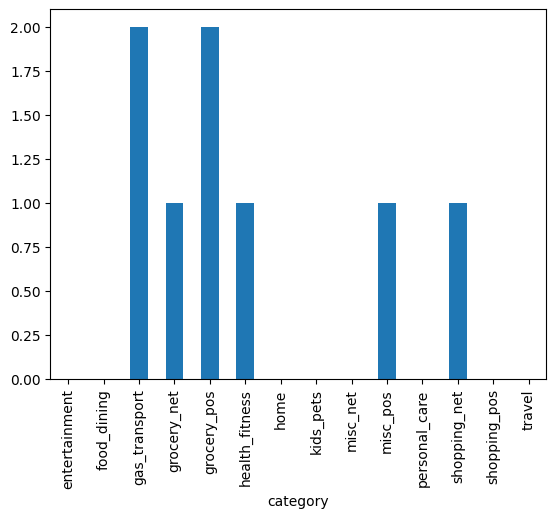

In [12]:
a.plot(kind='bar')



<AxesSubplot: xlabel='category,is_fraud'>

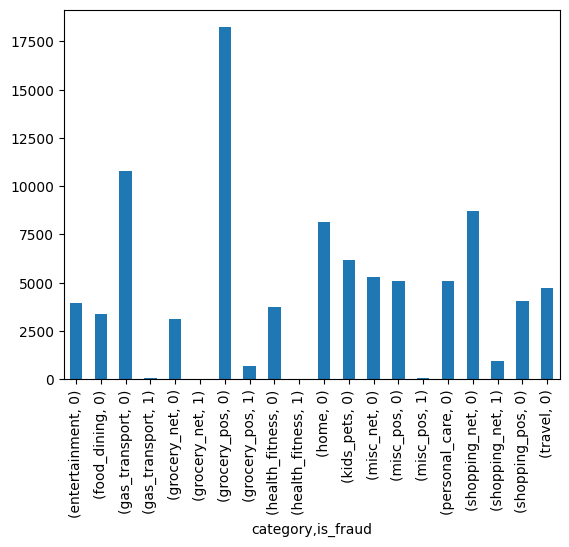

In [13]:
c.plot(kind='bar')

### conclusion et observation

  * les categories concernés par la fraude sont : 'gas_transport' , 'grocery_net', 'grocery_pos', 'health_fitness','misc_pos' et 'shopping_net'
  * il existe un lien entre le prix et la fraude : nous constatons ici que les fraude à la carte de credit ne concernne que les depenses de faibles couts .

## Question?Context

* 📊 Visualisation: Utilisez un tracé géospatial pour visualiser les taux de fraude dans différents états.
  

In [14]:
b=df.groupby(['city','state']).count()

b

,,trans_date_trans_time,merchant,category,amt,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
city,state,,,,,,,,,,,,,
Albuquerque,NM,11,11,11,11,11,11,11,11,11,11,11,11,11
Altonah,UT,11,11,11,11,11,11,11,11,11,11,11,11,11
Alva,WY,10,10,10,10,10,10,10,10,10,10,10,10,10
American Fork,UT,6,6,6,6,6,6,6,6,6,6,6,6,6
Arnold,MO,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Westfir,OR,6,6,6,6,6,6,6,6,6,6,6,6,6
Wheaton,MO,11,11,11,11,11,11,11,11,11,11,11,11,11
Williamsburg,MO,4,4,4,4,4,4,4,4,4,4,4,4,4


In [15]:
# à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
%pip install pandas fiona shapely pyproj rtree 
%pip install contextily
%pip install geopandas


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [16]:
import geopandas as gpd
import contextily as ctx

Le package geopandas est une boîte à outils conçue pour faciliter la manipulation de données spatiales. La grande force de geopandas est qu’il permet de manipuler des données spatiales comme s’il s’agissait de données traditionnelles

In [17]:
%pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
%pip install git+https://github.com/inseefrlab/cartogether

Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/inseefrlab/cartogether to c:\users\amint\appdata\local\temp\pip-req-build-zpp_k3vq
  Resolved https://github.com/inseefrlab/cartogether to commit 70f30d1659983a35e426480d684b40d4ba33b84e
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartogether 'C:\Users\amint\AppData\Local\Temp\pip-req-build-zpp_k3vq'


<AxesSubplot: >

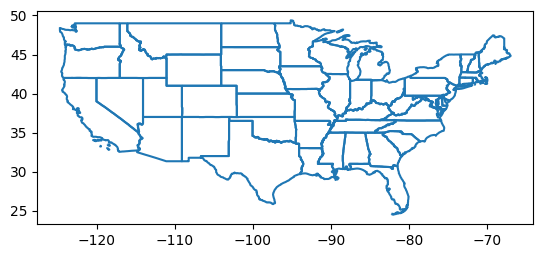

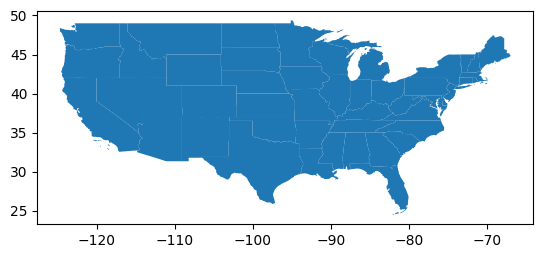

In [18]:
fillename = r'data/usa.json'
carte = gpd.read_file(fillename)

carte.boundary.plot()
carte.plot()


In [19]:
carte.head()


,id,ID,geometry
0,48,None,"POLYGON ((-102.99344 36.49785, -102.16741 36.4..."
1,06,None,"MULTIPOLYGON (((-118.57260 33.46729, -118.4686..."
2,21,None,"POLYGON ((-89.14145 36.97807, -89.14145 37.022..."
3,13,None,"POLYGON ((-85.62358 34.98008, -85.47916 34.980..."
4,55,None,"MULTIPOLYGON (((-86.91173 45.41787, -86.84241 ..."


In [20]:
carte.shape

(49, 3)

<AxesSubplot: >

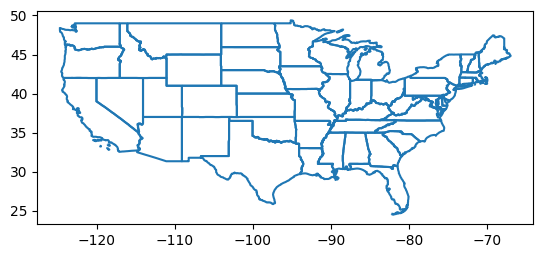

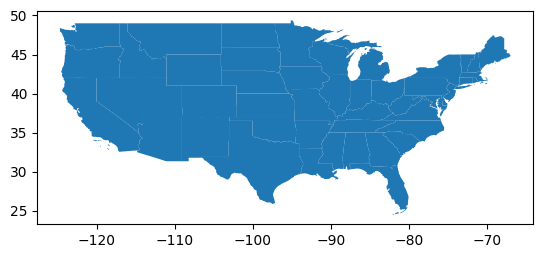

In [21]:
fillename2 = r'data/usa2.json'
carte2 = gpd.read_file(fillename2)

carte2.boundary.plot()
carte2.plot()


## Question?Context

* 🔎 Analyse : Les clients âgés sont-ils significativement plus susceptibles d'être victimes de fraude à la carte bancaire ?
  

nous tenterons d'analyser le dataframe selon les tentatives de fraudes (is_fraud) et l'age des clients (ici "dob" pour la date de naissance)
on va créer une nouvelle colonne indiquant si l’on est vieux

In [22]:
df.shape

(1333, 15)

In [23]:
import pandas as pd
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


C:\Users\amint\AppData\Local\Temp\ipykernel_24716\2295573435.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method='pearson')


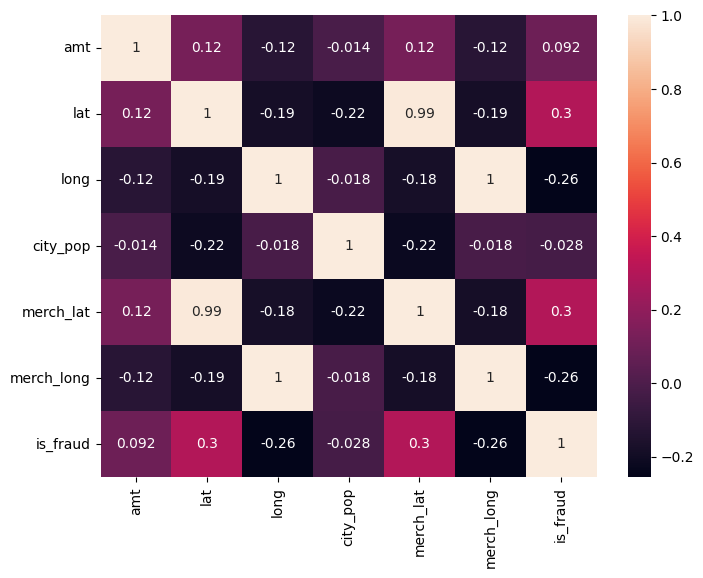

In [24]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [25]:
df_good = ['is_fraud','city','state','dob', 'city_pop','category']

df_age= df[df_good]

df_age

,is_fraud,city,state,dob,city_pop,category
0,0,Orient,WA,1978-06-21,149,grocery_pos
1,0,Malad City,ID,1962-01-19,4154,entertainment
2,0,Grenada,CA,1945-12-21,589,grocery_pos
3,0,High Rolls Mountain Park,NM,1967-08-30,899,shopping_pos
4,0,Freedom,WY,1967-08-02,471,misc_pos
...,...,...,...,...,...,...
1328,0,Kansas City,MO,1987-11-18,545147,personal_care
1329,0,Redford,MO,1974-10-27,241,personal_care
1330,0,Littleton,CO,1975-07-31,320420,personal_care
1331,0,Espanola,NM,1972-07-18,18408,kids_pets


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  1333 non-null   object 
 1   merchant               1333 non-null   object 
 2   category               1333 non-null   object 
 3   amt                    1333 non-null   float64
 4   city                   1333 non-null   object 
 5   state                  1333 non-null   object 
 6   lat                    1333 non-null   float64
 7   long                   1333 non-null   float64
 8   city_pop               1333 non-null   int64  
 9   job                    1333 non-null   object 
 10  dob                    1333 non-null   object 
 11  trans_num              1333 non-null   object 
 12  merch_lat              1333 non-null   float64
 13  merch_long             1333 non-null   float64
 14  is_fraud               1333 non-null   int64  
dtypes: f

In [27]:
df['dob']=pd.to_datetime(df['dob'])
df.dtypes


trans_date_trans_time            object
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object